# IMPORTING LIBRARIES

In [2]:
from sklearn import linear_model as lm
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as sts
import pandas as pd
import scipy as scp
import numpy as np
import sklearn.preprocessing as preproc
from sklearn.model_selection import train_test_split  ### for train and test split package
from sklearn import metrics  ## For calculation of MSE & RMSE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score


Reading the csv data through Pandas DataFrame

In [4]:
bank=pd.read_csv("QualitativeBankruptcy.csv")
print(bank)

    Industrial Risk Management Risk Financial Flexibility Credibility  \
0                 P               P                     A           A   
1                 N               N                     A           A   
2                 A               A                     A           A   
3                 P               P                     P           P   
4                 N               N                     P           P   
..              ...             ...                   ...         ...   
245               N               N                     A           N   
246               P               N                     N           N   
247               A               N                     N           N   
248               N               N                     N           N   
249               P               N                     N           N   

    Competitiveness Operating Risk Class  
0                 A              P    NB  
1                 A              N   

# Data analysis

In [5]:
bank.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [6]:
bank.shape   ## It display the no. of rows and column

(250, 7)

The Dataset has 250 rows and 7 columns

In [7]:
## It gives the unique label of each column

for col in bank:
    print (col)
    print (bank[col].unique())

Industrial Risk
['P' 'N' 'A']
Management Risk
['P' 'N' 'A']
Financial Flexibility
['A' 'P' 'N']
Credibility
['A' 'P' 'N']
Competitiveness
['A' 'P' 'N']
Operating Risk
['P' 'N' 'A']
Class
['NB' 'B']


In [8]:
bank.describe()  ##It gives the summary of the DataFrame

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
count,250,250,250,250,250,250,250
unique,3,3,3,3,3,3,2
top,N,N,N,N,N,N,NB
freq,89,119,119,94,103,114,143


The columns are in categorical text form. For our modelling purpose we have to convert it into numerical form, 
so we have to apply Label Encoding. For that we have to assign all the columns name to a variable to perform 
Label Encoding in loop.

In [13]:
var = ['Industrial Risk','Management Risk','Financial Flexibility','Credibility','Competitiveness', 'Operating Risk', 'Class']
var

['Industrial Risk',
 'Management Risk',
 'Financial Flexibility',
 'Credibility',
 'Competitiveness',
 'Operating Risk',
 'Class']

In [14]:
def func_labelEncoder(var,features):
    encode= LabelEncoder()
    features[var] = encode.fit_transform(features[var].astype(str))
    
for i in var:
    func_labelEncoder(i,bank)


In [15]:
bank.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,2,2,0,0,0,2,1
1,1,1,0,0,0,1,1
2,0,0,0,0,0,0,1
3,2,2,2,2,2,2,1
4,1,1,2,2,2,1,1


Through Label Encoder we have transformed all the cloumns into Numerical value so as it will best suit for our modelling purpose.

# Data Analysis on Tranformed Data

In [16]:
bank.describe()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.996000,0.972000,0.932000,1.008000,1.140000,1.088000,0.572000
std,0.804096,0.724788,0.722123,0.791481,0.755435,0.733764,0.495781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


Now, We got all the details of the columns value. Their mean,standard deviation, count,min , max etc.



We have to check if any null value exist for any columns or not.

In [17]:
bank.isnull().any()

Industrial Risk          False
Management Risk          False
Financial Flexibility    False
Credibility              False
Competitiveness          False
Operating Risk           False
Class                    False
dtype: bool

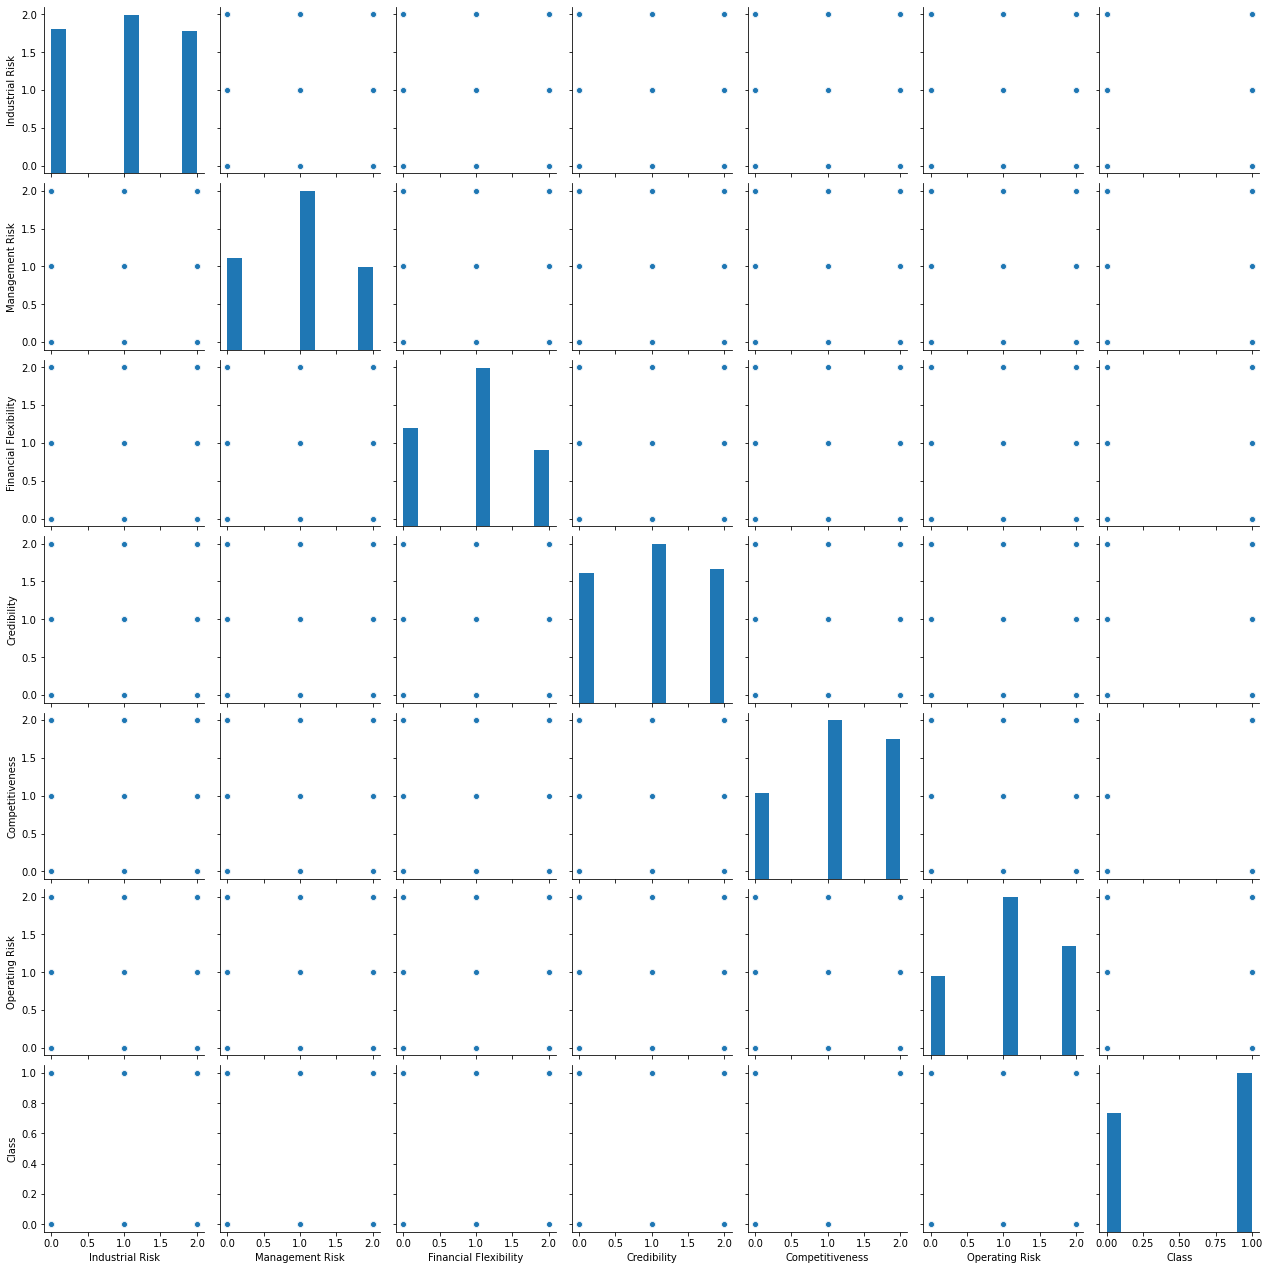

In [18]:
sns.pairplot(bank)

Calculating the Correlation for each columns

In [29]:
bank.corr()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
Industrial Risk,1.000000,0.110063,0.068694,-0.050432,0.060428,0.177573,0.015836
Management Risk,0.110063,1.000000,-0.018999,-0.006609,-0.132174,0.253851,0.100632
Financial Flexibility,0.068694,-0.018999,1.000000,-0.020124,0.150036,-0.064455,-0.047966
Credibility,-0.050432,-0.006609,-0.020124,1.000000,0.092155,0.054104,0.152045
Competitiveness,0.060428,-0.132174,0.150036,0.092155,1.000000,-0.073031,0.203521
Operating Risk,0.177573,0.253851,-0.064455,0.054104,-0.073031,1.000000,0.159147
Class,0.015836,0.100632,-0.047966,0.152045,0.203521,0.159147,1.000000


In the above we can see the correlation between different variables are between -0.5 to 0.5, so we can take all the variables for developing prediction model.

# Storing the dependent variables to xVal and independent variable to yVal

In [32]:
xVal = bank.drop(['Class'], axis=1)

In [33]:
xVal.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,2,2,0,0,0,2
1,1,1,0,0,0,1
2,0,0,0,0,0,0
3,2,2,2,2,2,2
4,1,1,2,2,2,1


In [34]:
yVal = bank.Class.values.reshape(-1,1)

In [35]:
yVal.shape

(250, 1)

We will split the whole dataset into test and train row.The train data will be 80% of the total dataset and test data will be 20% of the dataset.

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(xVal,yVal, test_size=0.2, random_state=42)

In [37]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", Y_test.shape)

X_train shape: (200, 6)
X_test shape: (50, 6)
Y_train shape: (200, 1)
X_test shape: (50, 1)


# Applying Logistic Regression Model

In [38]:
### 1. Logistic Regression Model

lmod = lm.LogisticRegression(penalty='l2',fit_intercept=True,max_iter=500,solver='lbfgs',tol=0.0001,multi_class='ovr')

# Training the Logistic Model

In [39]:
lrmod = lmod.fit(X_train,Y_train.ravel())

In [40]:
lrmod.intercept_  ### Intercapt (B0)

array([-0.89782944])

In [41]:
lrmod.coef_   ### Coefficients (B1, B2...)

array([[-0.16351577,  0.30790269, -0.17435897,  0.2731382 ,  0.53710566,
         0.32286241]])

# Predicting the test data

In [42]:
predicted_data = lrmod.predict(X_test)  ### Predicting the  model for independent test data

In [43]:
predicted_data

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0])

# Confusion Matrix

In [44]:
confusion_matrix(Y_test, predicted_data)

array([[ 7, 14],
       [ 5, 24]], dtype=int64)

In [45]:
from sklearn import metrics as accuracyMatrics

In [46]:
accuracyMatrics.accuracy_score(Y_test, predicted_data)  ## Predicting accuracy score

0.62

Here we are getting accuracy of 62%. As we have less number of rows in this dataset thats why we are getting less accuracy.



Precision

In [47]:
prec = accuracyMatrics.precision_score(Y_test, predicted_data)  ## Precision score
prec

0.631578947368421

Recall

In [49]:
recall = accuracyMatrics.recall_score(Y_test, predicted_data)  ## Recall score
recall

0.8275862068965517